# Flight Price Prediction

Of all the unanswered question: How exactly did life begin? Why do we dream? - perhaps the greatest is this: Flight Price.
Finding the most favourable timing for airline ticket purchasing from the customer's perspective is challenging because buyers have insufficient information for reasoning about future price movements. Buy a ticket one day at some price; buy that same ticket a few days later, it will be a whole different story.

Well, this question can be solved and Data science is the key to it. 

For any prediction problem, we need hostorical data to work with. Here, we have prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities. 

Size of training set: 10683 records; Size of test set: 2671 

FEATURES:

Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination. 

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

So let's get started by importing the useful libraries.

## Importing Libraries

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the dataset
Here we have test and train data in different excel file

In [13]:
train_df=pd.read_excel("C:/Users/ASUS/Downloads/Data_Train.xlsx")
test_df=pd.read_excel("C:/Users/ASUS/Downloads/Test_set.xlsx")

## Size of train data

In [23]:
train_df.shape

(10683, 11)

train data has 10683 observations and 11 features

In [24]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [25]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


# Data Preprocessing

## Checking missing value

In [26]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Since there is only one missing value we can opt to remove the row with missing value

In [27]:
train_df.dropna(inplace=True)

In [28]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

We are left with zero missing values now

In [29]:
train_df.describe(include="object")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10682,10682,10682,10682,10682,10682,10682,10682,10682,10682
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4536,4536,2376,233,423,550,5625,8344


From the above info function, we can see that Date_of_journey is of object datatype. This needs to be converted to timestamp.

In below step, we have first converted Date_of journey to datetime using to_datetime and then extracted the day and month using dt.day and dt.month and stored it into new columns Journey_day and Journey_month.

**Since we have data for only one year, extracting year will be of no use**

In [30]:
train_df["Journey_day"]=pd.to_datetime(train_df["Date_of_Journey"],format="%d/%m/%Y").dt.day
train_df["Journey_month"]=pd.to_datetime(train_df["Date_of_Journey"],format="%d/%m/%Y").dt.month
#train_df["Journey_year"]=pd.to_datetime(train_df["Date_of_Journey"],format="%d/%m/%Y").dt.year

In [31]:
#train_df.head()

Dropping Date_of_journey as it is of no use now

In [32]:
train_df.drop(["Date_of_Journey"],axis=1,inplace=True)

Dep_Time is also of object datatype. Converting the datatype to datetime using to_datetime and extracting hour and min using dt.hour and dt.minute and storing it in new columns Dep_hour and Dep_min

In [33]:
train_df["Dep_hour"]=pd.to_datetime(train_df["Dep_Time"]).dt.hour
train_df["Dep_min"]=pd.to_datetime(train_df["Dep_Time"]).dt.minute

In [34]:
#train_df.head()

In [35]:
train_df["Dep_hour"]=pd.to_datetime(train_df["Dep_Time"]).dt.hour
train_df["Dep_min"]=pd.to_datetime(train_df["Dep_Time"]).dt.minute

Dropping Dep_Time as it is of no use now.

In [36]:
train_df.drop(["Dep_Time"],axis=1,inplace=True)

Similarly extracting hours and minute from Arrival_time and storing in new column Arrival_hour and Arrival_min

In [37]:
train_df["Arrival_hour"]=pd.to_datetime(train_df["Arrival_Time"]).dt.hour
train_df["Arrival_min"]=pd.to_datetime(train_df["Arrival_Time"]).dt.minute

Dropping Arrival_time

In [38]:
train_df.drop(["Arrival_Time"],axis=1,inplace=True)

Since Duration is of object data type and contains hours and minutes. Soextracting hours and min in different lists. Then converting hours into minutes and adding with minutes. So the duration is now in minutes

In [39]:
duration = list(train_df["Duration"])
for i in range(len(duration)):
    if len(duration[i].split())!=2 :
        if "h" in duration[i]:
            duration[i]=duration[i].strip() + " 0m"
        else: 
            duration[i]="0h " +duration[i]
duration_hours=[]
duration_min=[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep="h")[0]))
    duration_min.append(int(duration[i].split(sep="m")[0].split()[-1]))
            

In [40]:
type(duration_hours)

list

In [41]:
duration_hours = [x * 60 for x in duration_hours]

In [42]:
#duration_hours

In [43]:
duration_in_min = [sum(i) for i in zip(duration_hours, duration_min)]  

In [44]:
#duration_in_min

In [45]:
train_df["Duration_in_mins"]=duration_in_min

Dropping Duration

In [46]:
train_df.drop(["Duration"], axis = 1, inplace = True)

In [47]:
#train_df.head()

In [48]:
train_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_in_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,285


In [49]:
#train_df

In [50]:
train_df["Additional_Info"].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

Dropping Addititonal_Info and Route columns

In [51]:
train_df.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [52]:
train_df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_in_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,285


Since Total_Stops is ordinal, so we are assigning values according to the no. of stops a flight takes. 

In [53]:
train_df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [54]:
train_df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_in_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,285


## EDA

separating categorical and continuous variables into lists

In [55]:
def catcon(df):
    cat = []
    con = []
    for i in df.columns:
        if(df[i].dtypes=="object"):
            cat.append(i)
        else:
            con.append(i)
    return cat,con

In [56]:
x,y=catcon(train_df)

In [57]:
x

['Airline', 'Source', 'Destination']

In [58]:
y

['Total_Stops',
 'Price',
 'Journey_day',
 'Journey_month',
 'Dep_hour',
 'Dep_min',
 'Arrival_hour',
 'Arrival_min',
 'Duration_in_mins']

## Univariate Analysis

In [59]:
def univ(df):
    cat,con=catcon(df)
    for i in cat:
        sns.countplot(df[i])
        plt.show()

    for i in con:
        sns.distplot(df[i])
        plt.show()

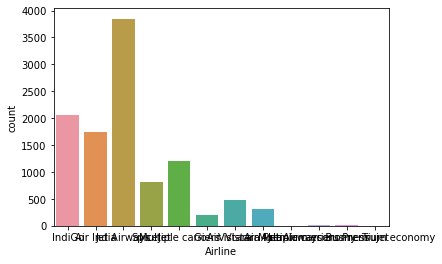

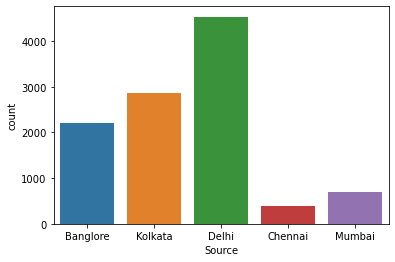

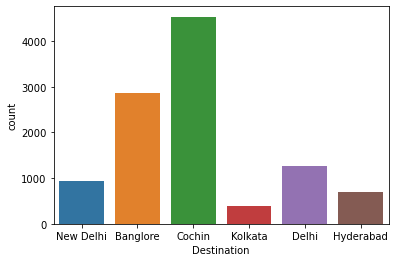

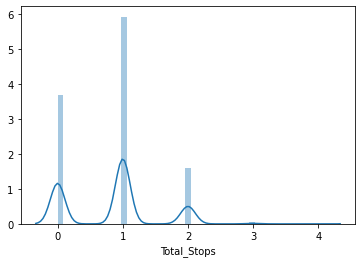

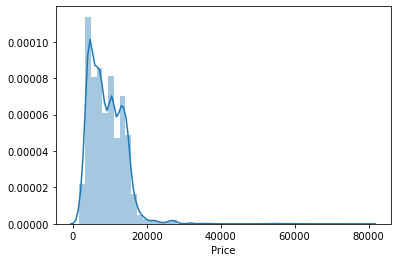

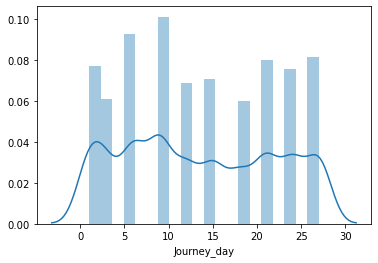

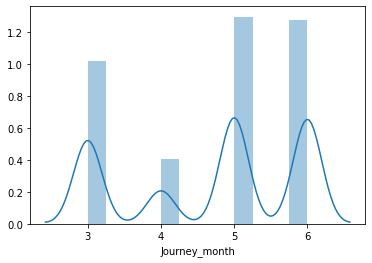

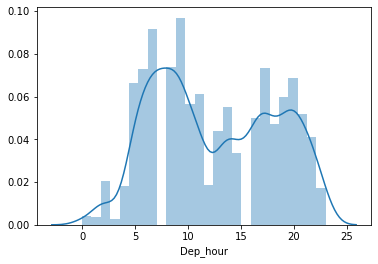

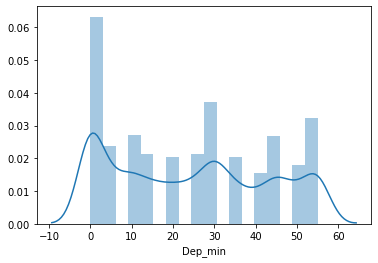

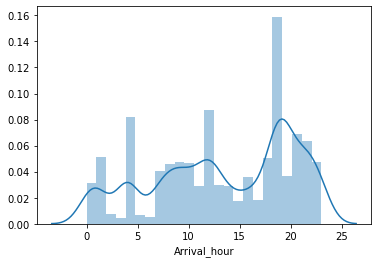

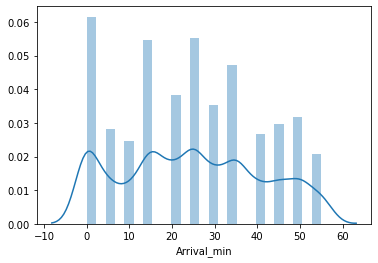

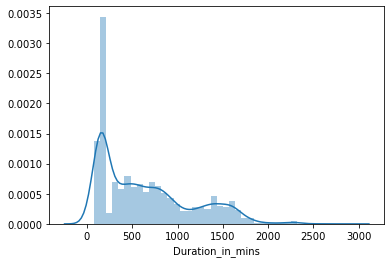

In [60]:
univ(train_df)

### Observations from univariate analysis:
The maximum number of flights are of Jetways airlines.

The maximum number of flights are servicing from Delhi.

The more number of flights are destined to Cochin

There are more number of flights with one stop

The maximum number of flights are from May and June month which is obvious because this is holiday season.




## Bivariate analysis

In [73]:
def bivar(df):
    cat,con=catcon(df)
    for i in cat:
        for j in con:
            sns.boxplot(df[i],df[j])
            plt.show()
    for i in con:
        for j in con:
            sns.scatterplot(df[i],df[j])
            plt.show()
    for i in cat:
        for j in cat:
            sns.countplot(df[i],hue=df[j])
            plt.show()

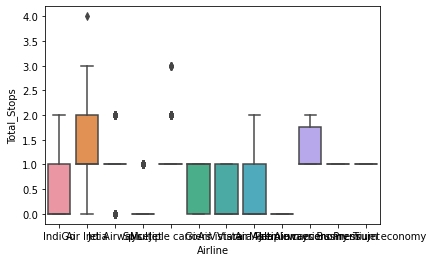

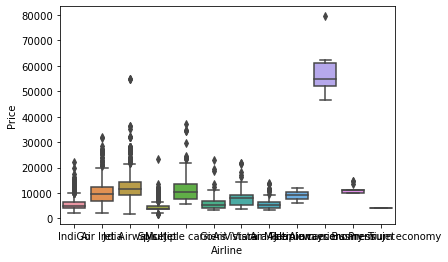

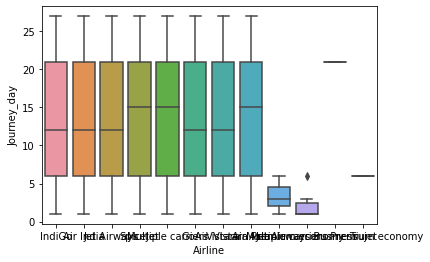

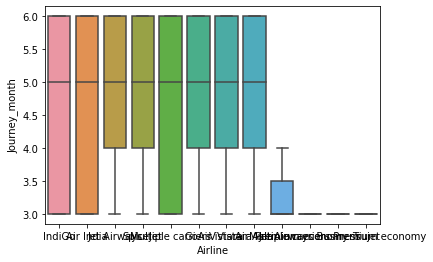

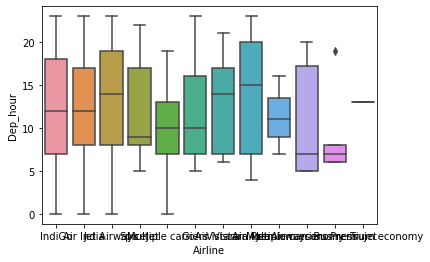

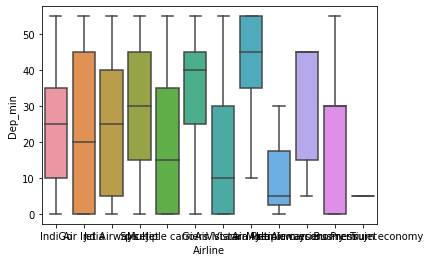

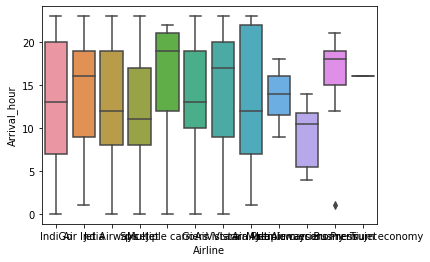

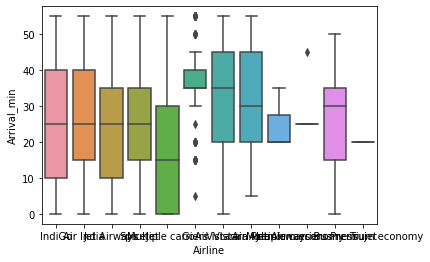

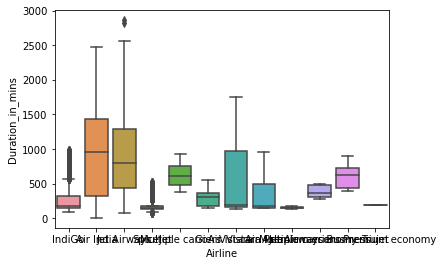

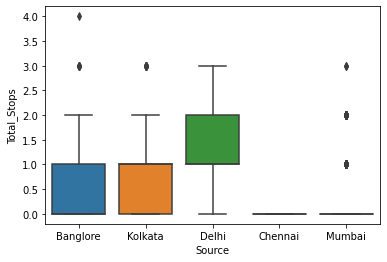

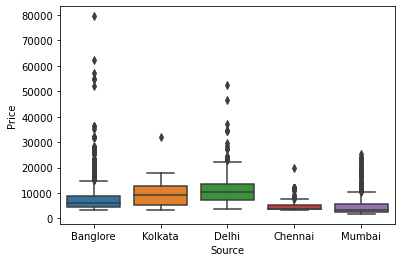

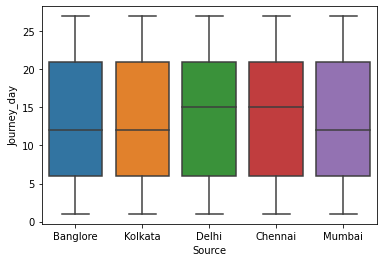

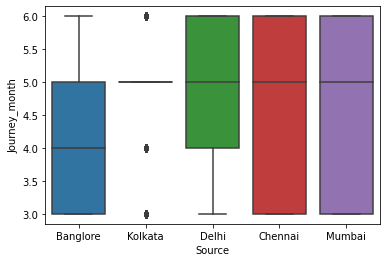

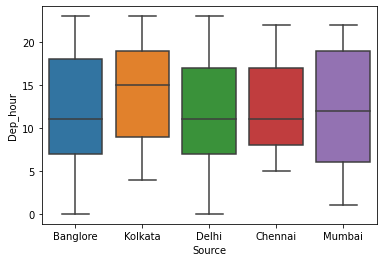

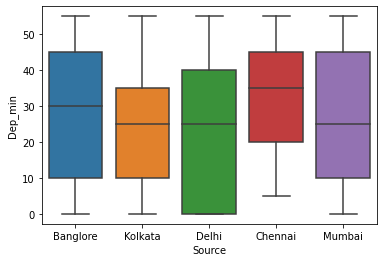

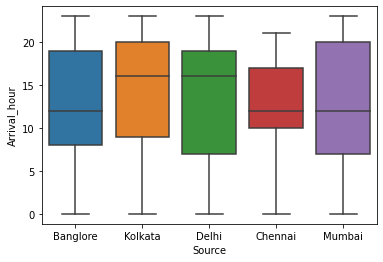

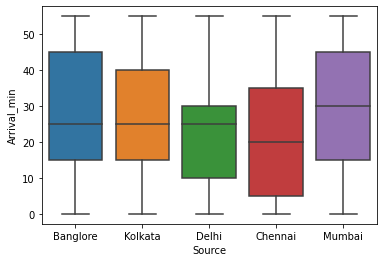

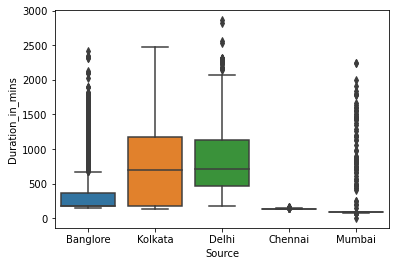

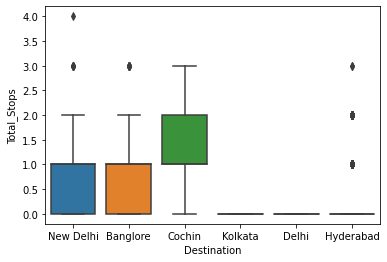

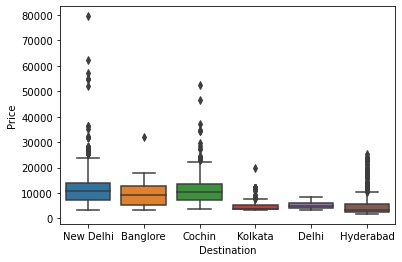

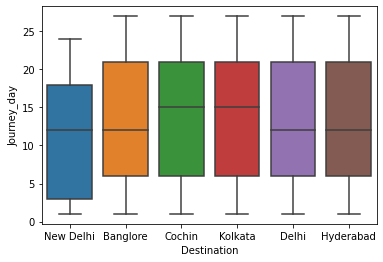

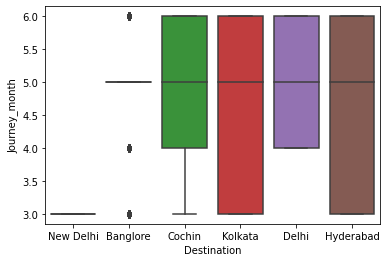

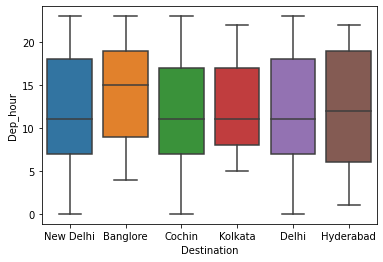

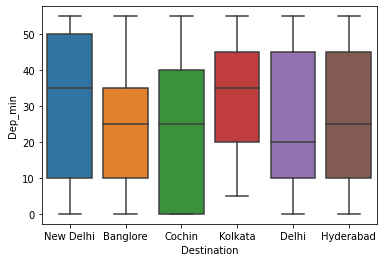

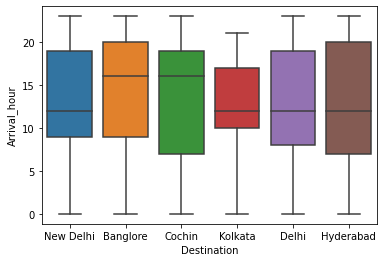

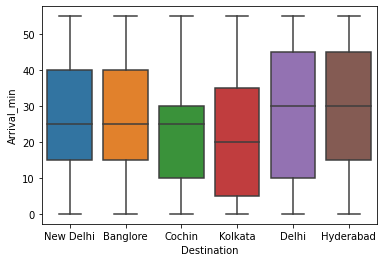

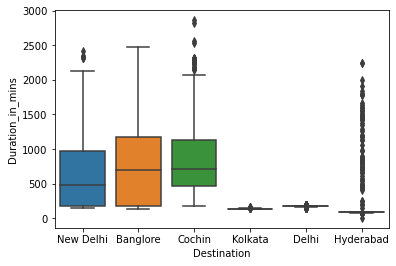

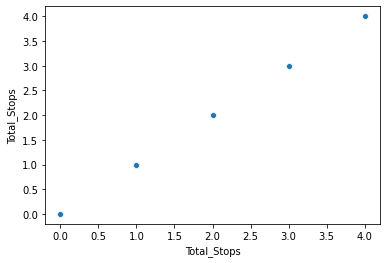

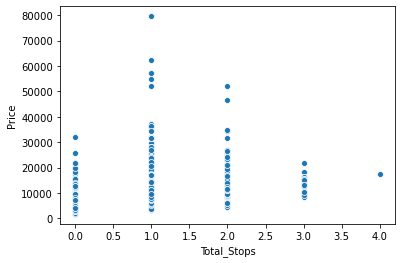

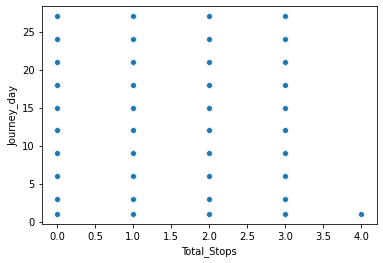

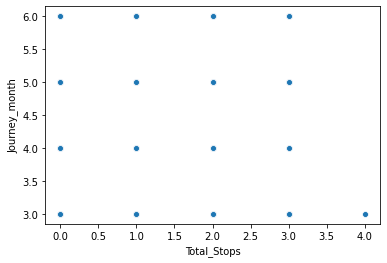

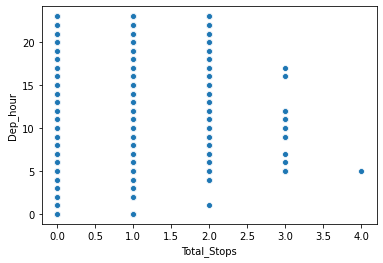

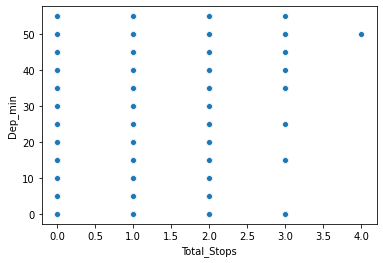

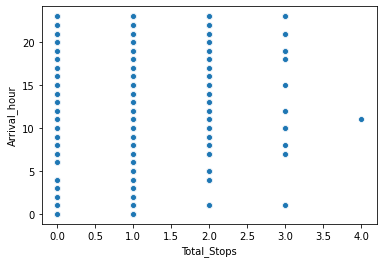

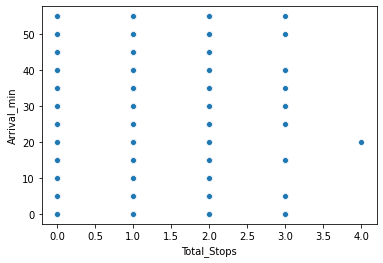

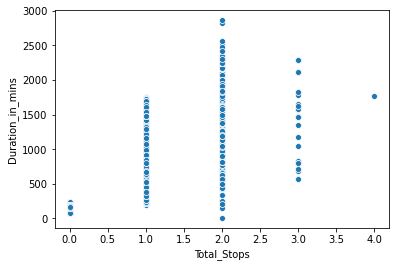

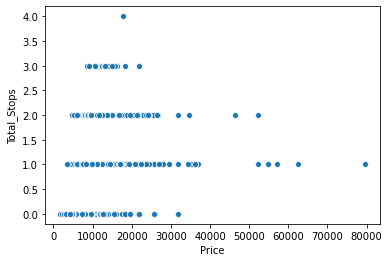

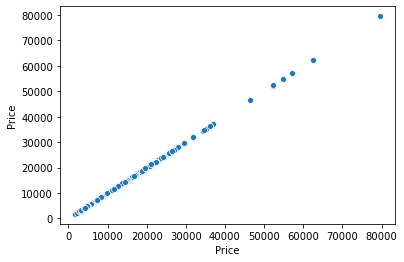

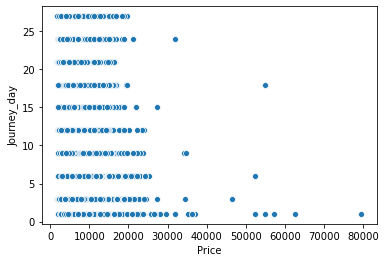

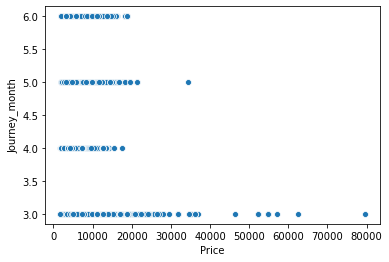

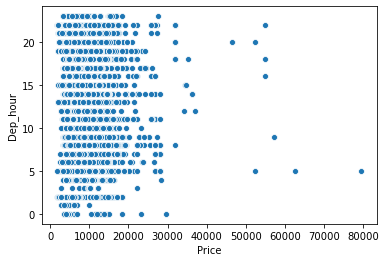

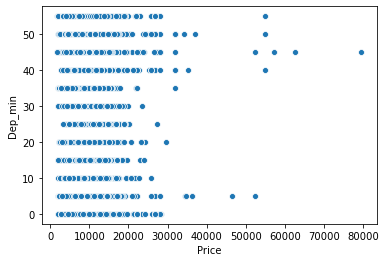

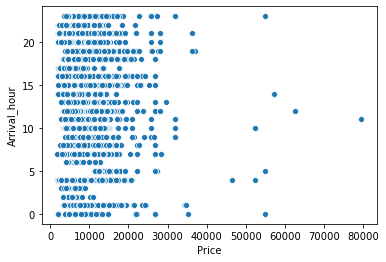

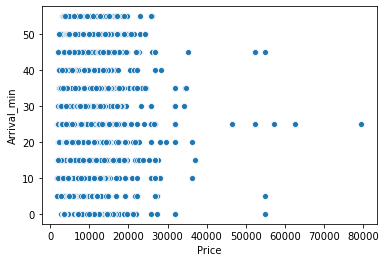

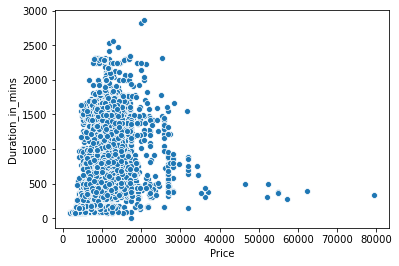

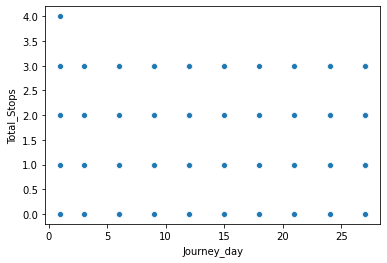

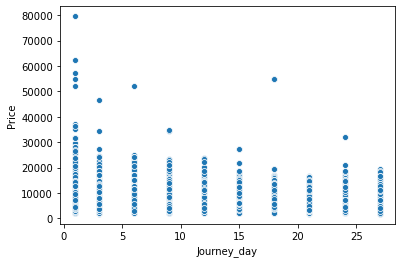

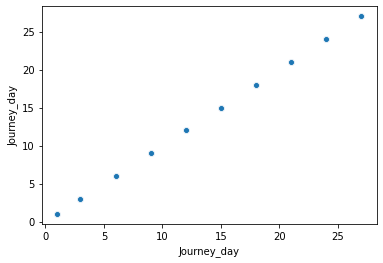

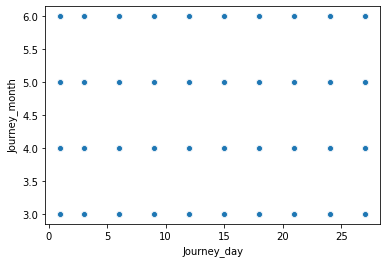

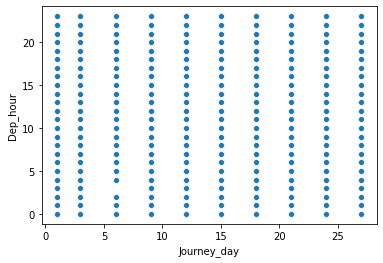

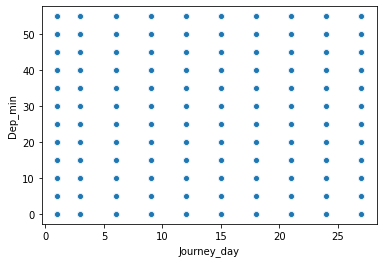

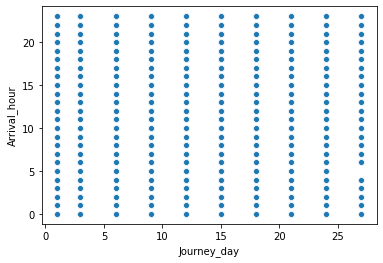

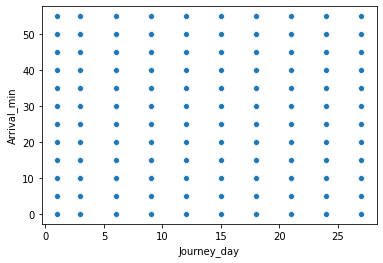

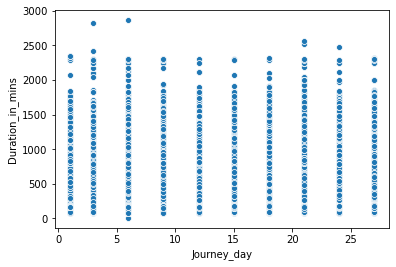

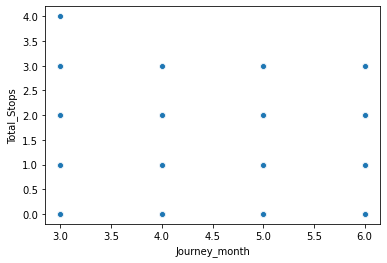

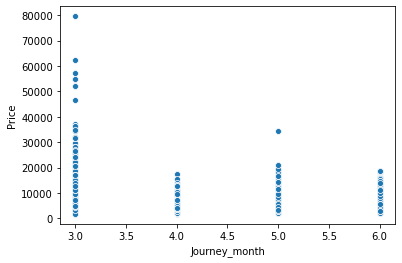

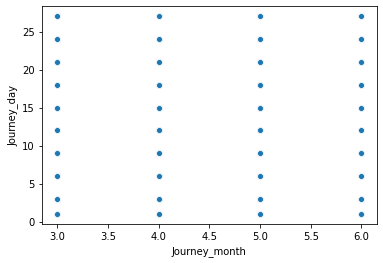

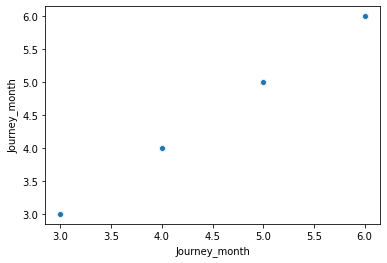

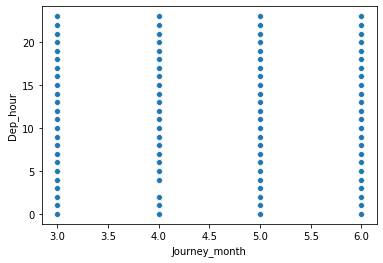

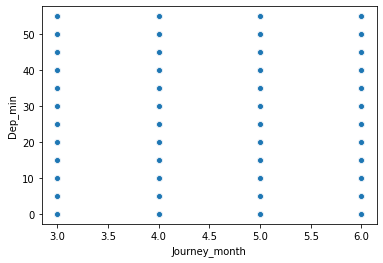

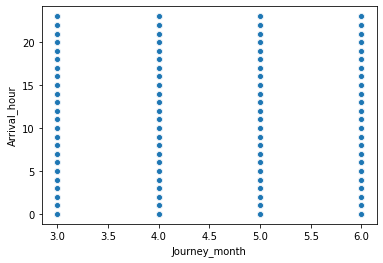

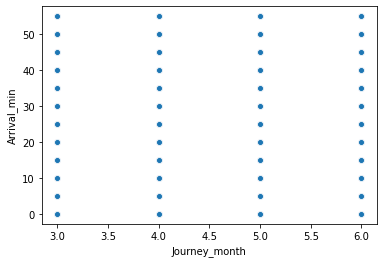

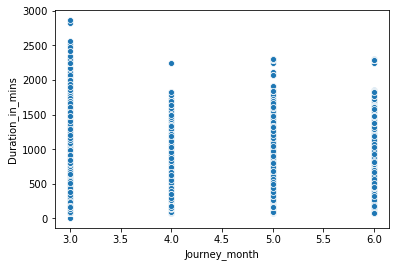

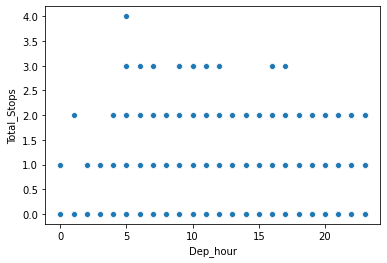

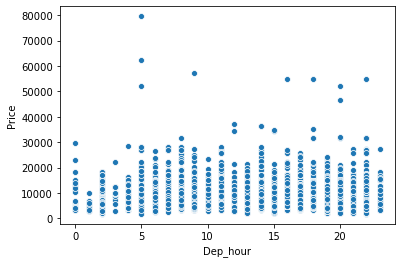

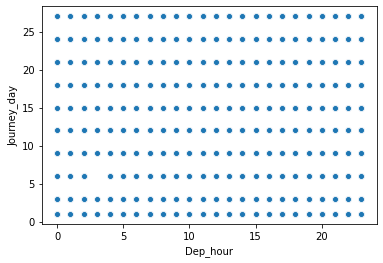

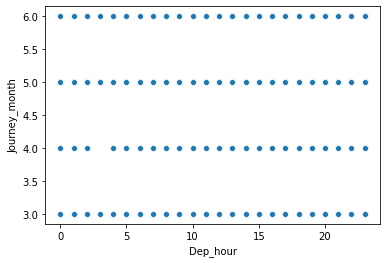

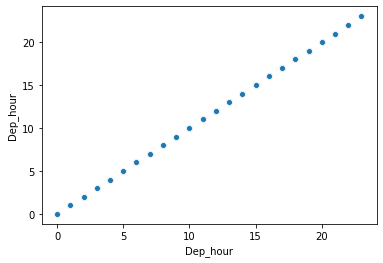

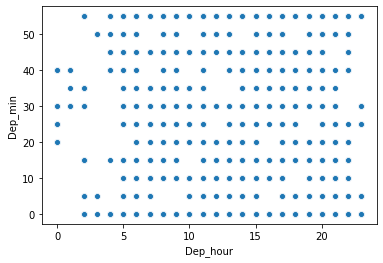

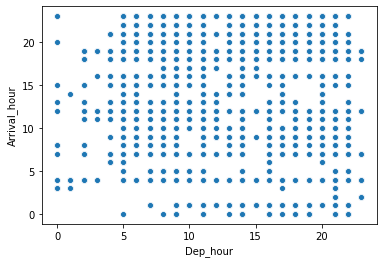

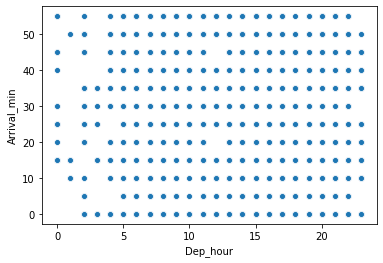

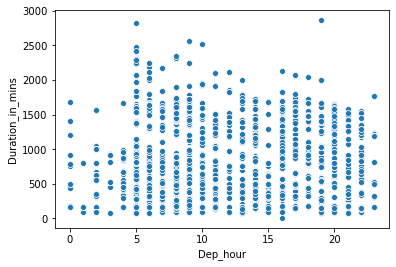

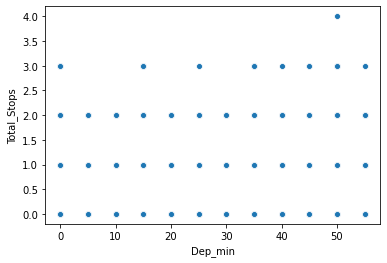

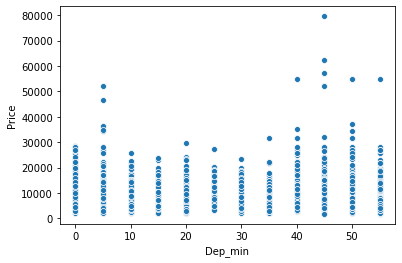

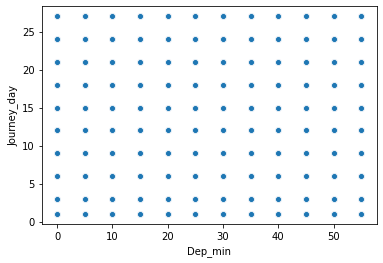

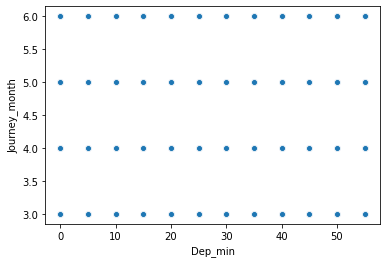

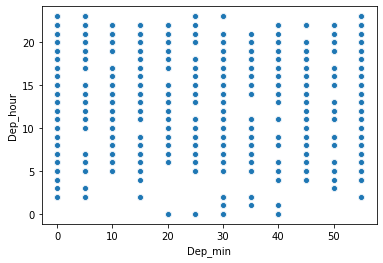

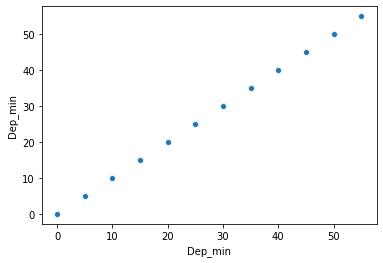

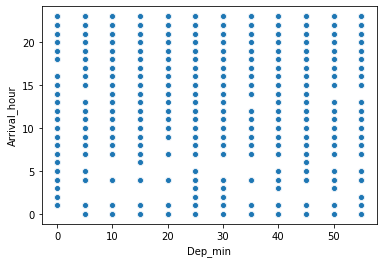

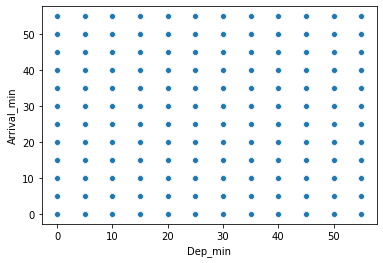

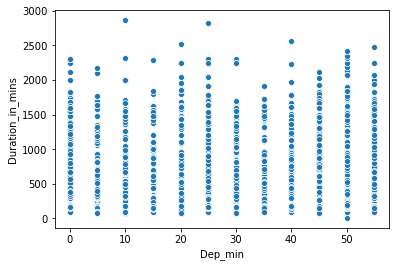

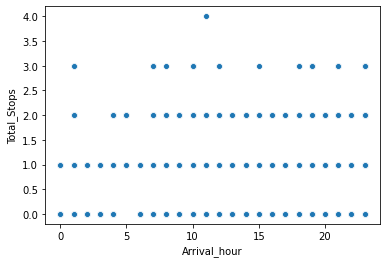

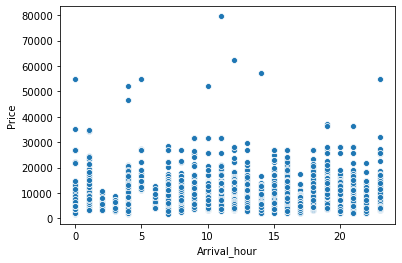

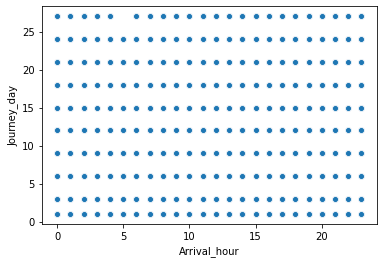

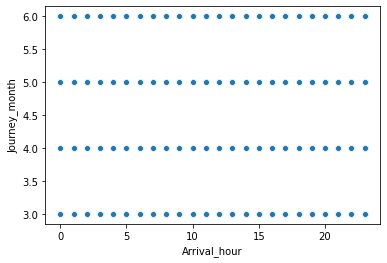

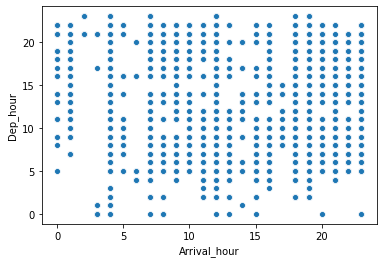

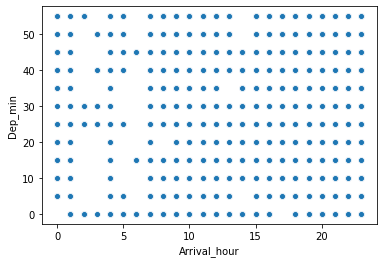

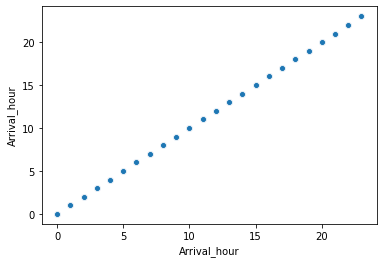

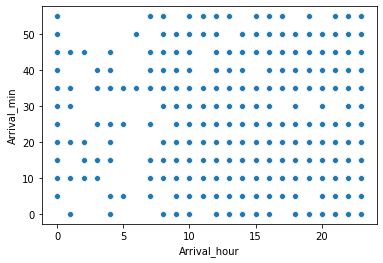

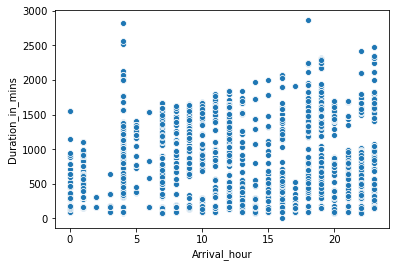

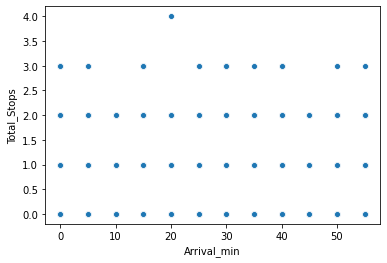

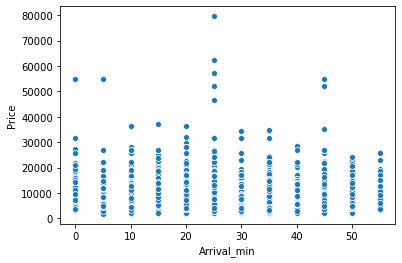

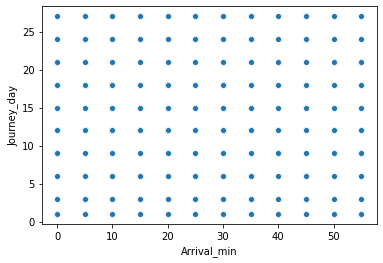

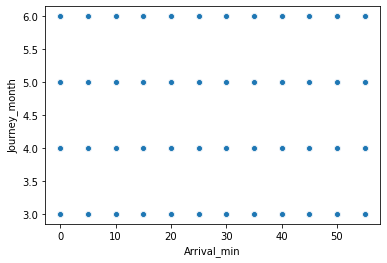

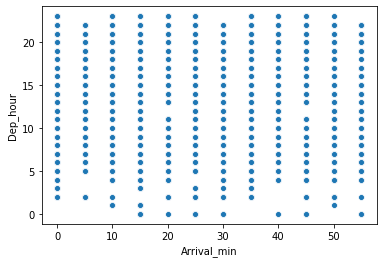

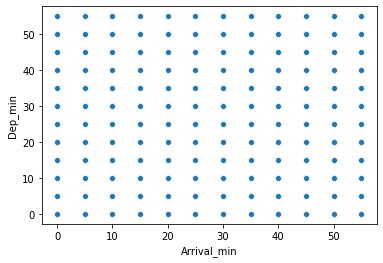

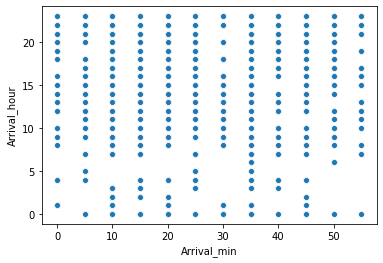

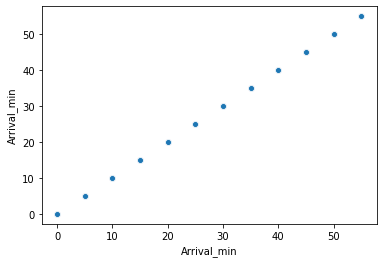

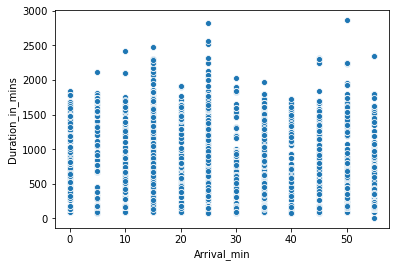

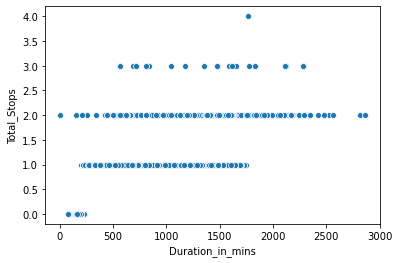

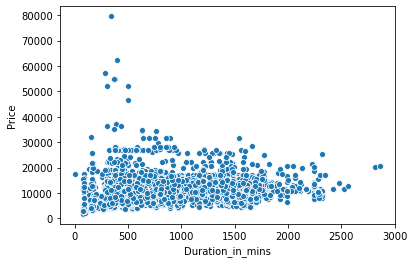

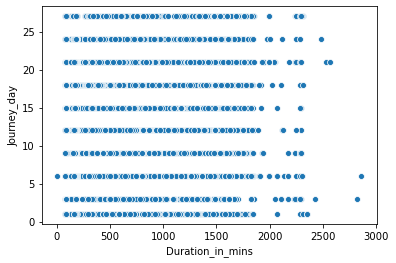

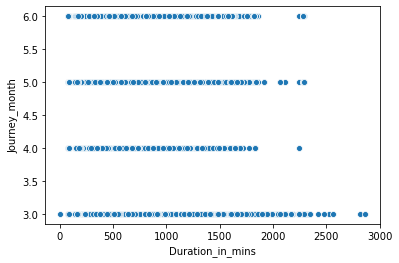

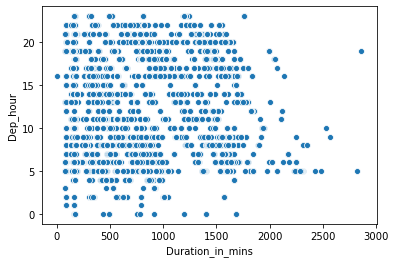

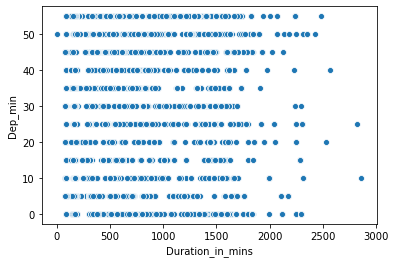

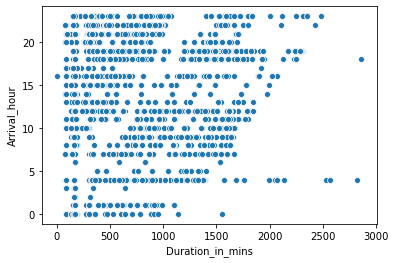

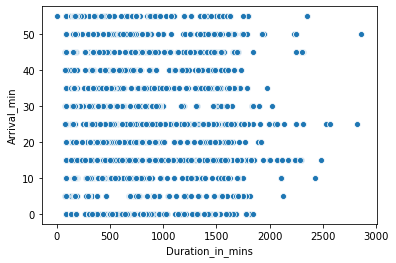

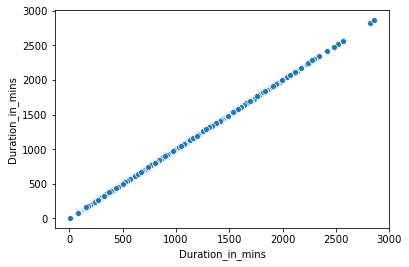

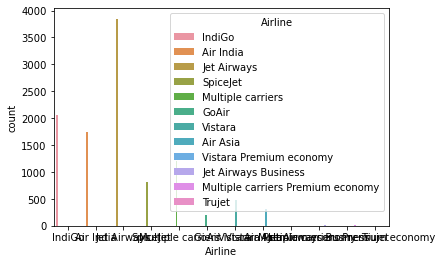

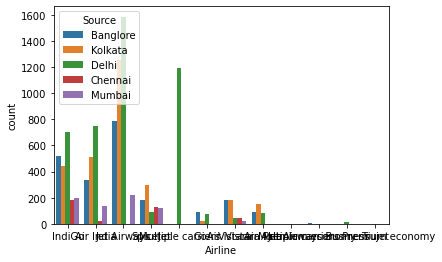

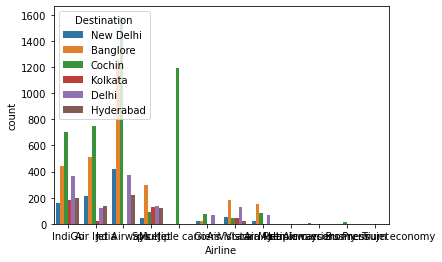

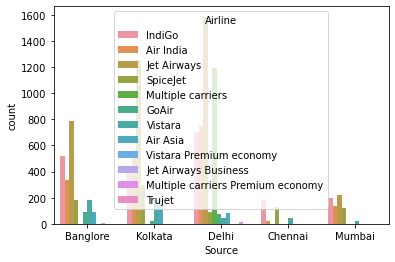

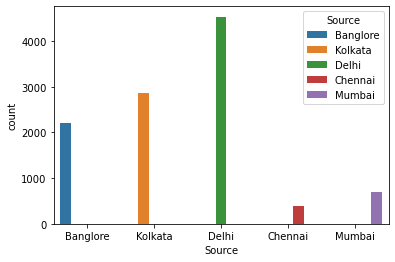

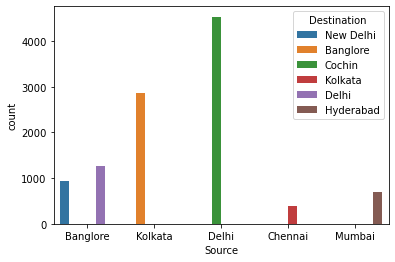

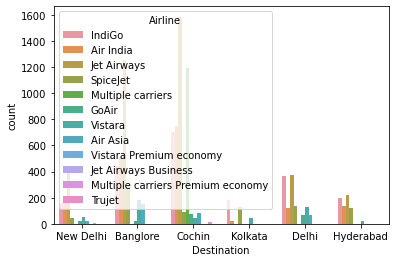

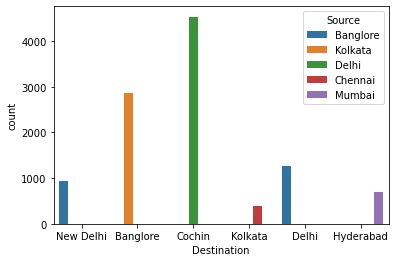

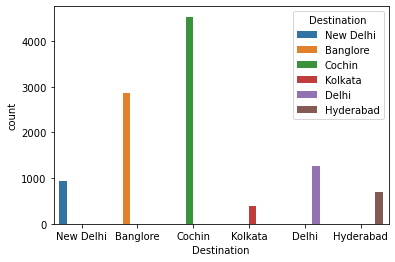

In [74]:
bivar(train_df)

### Observations from Bivariate Analysis
Jet Airways Business Airline have highest price.

Flights servicing from Bangalore has highest price.

Flights coming to Delhi has highest Price


    

## Correlation Analysis

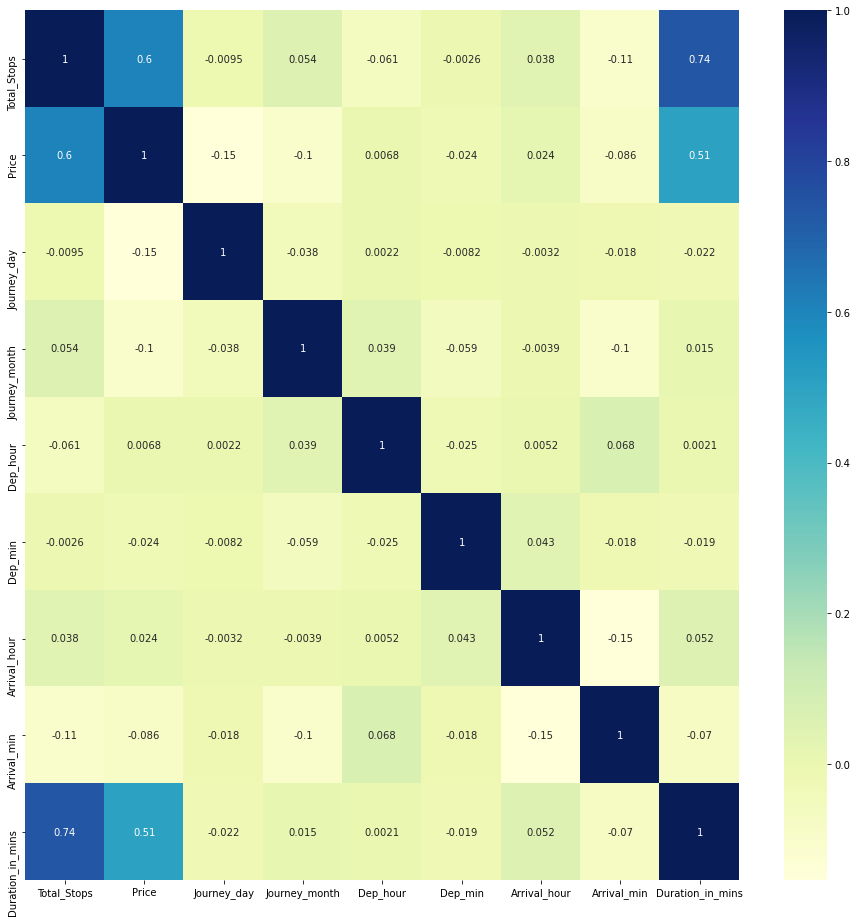

In [63]:
plt.figure(figsize = (16,16))
sns.heatmap(train_df.corr(),annot=True,cmap = "YlGnBu")

## Observations from above heatmap:

The Price increases with increase in number of stops with a correlation of 0.6

Duration increase with increase in number of stops which is obvious.


---------------------------------------------------------------------------------------------





Converting categorical features - Airline, Source and Destination to numerical data using label encoder.

In [36]:
Airline = train_df[["Airline"]]
Airline=pd.get_dummies(train_df["Airline"], drop_first= True)
Airline.head()


,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [37]:
train_df

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_in_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,285
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,19,55,22,25,150
10679,Air India,Kolkata,Banglore,0,4145,27,4,20,45,23,20,155
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,8,20,11,20,180
10681,Vistara,Banglore,New Delhi,0,12648,1,3,11,30,14,10,160


In [38]:

# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = train_df[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [39]:

# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = train_df[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [40]:
train_df

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_in_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,285
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,19,55,22,25,150
10679,Air India,Kolkata,Banglore,0,4145,27,4,20,45,23,20,155
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,8,20,11,20,180
10681,Vistara,Banglore,New Delhi,0,12648,1,3,11,30,14,10,160


In [41]:
train_data=pd.concat([train_df,Airline,Source,Destination],axis=1)


In [42]:
train_data.drop(["Airline","Source","Destination"],axis=1,inplace=True)

In [43]:
train_data.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_in_mins,Air India,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,170,0,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,445,1,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,1140,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,325,0,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,285,0,...,0,0,0,0,0,0,0,0,0,1


In [44]:
train_data.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_in_mins',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

---------------------------------------------------------

**Doing same operations with test data**

# Test set

In [45]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [46]:
test_df.shape

(2671, 10)

In [47]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [48]:
test_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [49]:
test_df["Journey_day"]=pd.to_datetime(test_df["Date_of_Journey"],format="%d/%m/%Y").dt.day
test_df["Journey_month"]=pd.to_datetime(test_df["Date_of_Journey"],format="%d/%m/%Y").dt.month
#train_df["Journey_year"]=pd.to_datetime(train_df["Date_of_Journey"],format="%d/%m/%Y").dt.year

In [50]:
test_df.drop(["Date_of_Journey"],axis=1,inplace=True)

In [51]:
test_df["Dep_hour"]=pd.to_datetime(test_df["Dep_Time"]).dt.hour
test_df["Dep_min"]=pd.to_datetime(test_df["Dep_Time"]).dt.minute

In [52]:
test_df.drop(["Dep_Time"],axis=1,inplace=True)

In [53]:
test_df["Arrival_hour"]=pd.to_datetime(test_df["Arrival_Time"]).dt.hour
test_df["Arrival_min"]=pd.to_datetime(test_df["Arrival_Time"]).dt.minute

In [54]:
test_df.drop(["Arrival_Time"],axis=1,inplace=True)

In [55]:
duration = list(test_df["Duration"])
for i in range(len(duration)):
    if len(duration[i].split())!=2 :
        if "h" in duration[i]:
            duration[i]=duration[i].strip() + " 0m"
        else: 
            duration[i]="0h " +duration[i]
duration_hours=[]
duration_min=[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep="h")[0]))
    duration_min.append(int(duration[i].split(sep="m")[0].split()[-1]))
duration_hours = [x * 60 for x in duration_hours]
duration_in_min = [sum(i) for i in zip(duration_hours, duration_min)] 
test_df["Duration_in_mins"]=duration_in_min
            

In [56]:
test_df.drop(["Duration"], axis = 1, inplace = True)

In [57]:
test_df.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

There is 1 missing value in route and total_stops

In [58]:
test_df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [59]:
Airline = test_df[["Airline"]]
Airline=pd.get_dummies(test_df["Airline"], drop_first= True)
Airline.head()


,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [60]:

# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = test_df[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [61]:

# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = test_df[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [62]:
test_df

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_in_mins
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,655
1,IndiGo,Kolkata,Banglore,1,12,5,6,20,10,20,240
2,Jet Airways,Delhi,Cochin,1,21,5,19,15,19,0,1425
3,Multiple carriers,Delhi,Cochin,1,21,5,8,0,21,0,780
4,Air Asia,Banglore,Delhi,0,24,6,23,55,2,45,170
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,1,6,6,20,30,20,25,1435
2667,IndiGo,Kolkata,Banglore,0,27,3,14,20,16,55,155
2668,Jet Airways,Delhi,Cochin,1,6,3,21,50,4,25,395
2669,Air India,Delhi,Cochin,1,6,3,4,0,19,15,915


In [63]:
test_df=pd.concat([test_df,Airline,Source,Destination],axis=1)


In [64]:
test_df.drop(["Airline","Source","Destination"],axis=1,inplace=True)

In [65]:
test_df.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_in_mins,Air India,GoAir,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,655,0,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,240,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,1425,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,780,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,170,0,0,...,0,0,0,0,0,0,1,0,0,0


In [66]:
train_df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_in_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,285


# Training the model

In [76]:
X=train_data.drop(["Price"],axis=1)
Y=train_data[["Price"]]

In [77]:
X.columns

Index(['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_in_mins', 'Air India', 'GoAir',
       'IndiGo', 'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [346]:
#importing Random forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
#splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
rf=RandomForestRegressor(criterion="mse",random_state=30)
from sklearn.model_selection import GridSearchCV
tp={"max_depth":range(2,20,1)}
cv=GridSearchCV(rf,tp,scoring="neg_mean_squared_error",cv=4)
cvmodel=cv.fit(X_train,y_train)
md=cvmodel.best_params_["max_depth"]
rf1=RandomForestRegressor(criterion="mse",random_state=30,max_depth=md)
model=rf1.fit(X_train,y_train)
pred=model.predict(X_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_absolute_error(y_test,pred))
rf1.score(X_train, y_train)

C:\Users\ASUS\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selec

C:\Users\ASUS\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selec

C:\Users\ASUS\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ASUS\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selec

1140.547348463536


0.9294397064215852

In [345]:
rf1.score(X_test, y_test)

0.8398274815646756

In [347]:
print('MSE:',mean_squared_error(y_test, pred))

MSE: 3453648.864085306


In [349]:
md

13

Saving the model in pickle file

In [351]:
import pickle
file=open("airfare.pkl","wb")
pickle.dump(rf1,file)


In [353]:
model=open("airfare.pkl","rb")
forest = pickle.load(model)

In [354]:
y_prediction = forest.predict(X_test)


In [358]:
metrics.r2_score(y_test, y_prediction)

0.8398274815646756